# Nikita Chandra Lazarus

## Is a spectator more likely to commit a crime if the team (wins/loses) or are they more susceptible to disorderly conduct for marginal results (OT)? (emotional influence) 

The team would like to conduct a research on whether spectators are more affected by the winning or losing of their team or are the speactators more influenced by other spectators' emotional state. Using matchday season data can correlate holiday/vacational/weekend games with crowd's emotional state during those season to prove our hypothesis.

In [ ]:
import numpy as np
import pandas as pd

pd.read_csv('/Users/nikitachandralzrs/Desktop/301/project-group03/data/raw/arrests.csv', sep= ",")

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n
...,...,...,...,...,...,...,...,...,...,...,...
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y


In [ ]:
pwd

'/Users/nikitachandralzrs/Desktop/301/project-group03/notebooks'

In [ ]:
import pandas as pd

In [ ]:
rawarrest = pd.read_csv('/Users/nikitachandralzrs/Desktop/301/project-group03/data/raw/arrests.csv', sep= ",")
rawarrest
rawarrest.columns

Index(['season', 'week_num', 'day_of_week', 'gametime_local', 'home_team',
       'away_team', 'home_score', 'away_score', 'OT_flag', 'arrests',
       'division_game'],
      dtype='object')

In [ ]:
rawarrest.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


In [ ]:
rawarrest.tail()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y
1005,2015,15,Sunday,1:00:00 PM,Washington,Buffalo,35,25,NaN,1.0,n


In [ ]:
print(rawarrest.shape)
print(rawarrest.head())
print(rawarrest.columns)

(1006, 11)
   season  week_num day_of_week gametime_local home_team        away_team  \
0    2011         1      Sunday     1:15:00 PM   Arizona         Carolina   
1    2011         4      Sunday     1:05:00 PM   Arizona  New York Giants   
2    2011         7      Sunday     1:05:00 PM   Arizona       Pittsburgh   
3    2011         9      Sunday     2:15:00 PM   Arizona        St. Louis   
4    2011        13      Sunday     2:15:00 PM   Arizona           Dallas   

   home_score  away_score OT_flag  arrests division_game  
0          28          21     NaN      5.0             n  
1          27          31     NaN      6.0             n  
2          20          32     NaN      9.0             n  
3          19          13      OT      6.0             y  
4          19          13      OT      3.0             n  
Index(['season', 'week_num', 'day_of_week', 'gametime_local', 'home_team',
       'away_team', 'home_score', 'away_score', 'OT_flag', 'arrests',
       'division_game'],
  

In [ ]:
rawarrest.nunique(axis=0)
#rawarrest.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

season             5
week_num          17
day_of_week        5
gametime_local    46
home_team         26
away_team         32
home_score        54
away_score        46
OT_flag            1
arrests           51
division_game      2
dtype: int64

In [ ]:
rawarrest.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,season,week_num,home_score,away_score,arrests
count,1006.000000,1006.000000,1006.000000,1006.000000,966.000000
mean,2013.000000,9.116302,23.934394,21.115308,6.566253
std,1.406453,5.008986,10.442626,9.734006,9.512101
min,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,2012.000000,5.000000,17.000000,14.000000,1.000000
50%,2013.000000,9.000000,23.000000,20.000000,3.000000
75%,2014.000000,14.000000,30.000000,27.000000,8.000000
max,2015.000000,17.000000,59.000000,56.000000,69.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Average number of arrest during the week for first 100 datapoints'),
 Text(0, 0.5, 'Arrests'),
 Text(0.5, 0, 'Day of the week')]

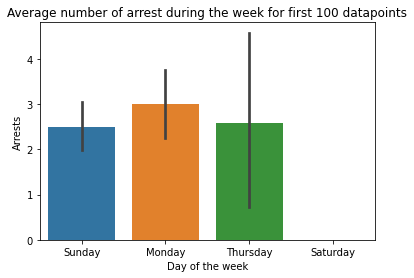

In [ ]:
rawheaddf = rawarrest.head(100)
sns.barplot(x='day_of_week', y = 'arrests', data=rawheaddf).set(title='Average number of arrest during the week for first 100 datapoints',ylabel='Arrests', xlabel='Day of the week')

In [ ]:
arrestsmax = rawarrest[rawarrest['arrests'].gt(40)]
arrestsmax

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
591,2013,12,Sunday,4:25:00 PM,New York Giants,Dallas,21,24,NaN,46.0,y
646,2015,10,Thursday,8:25:00 PM,New York Jets,Buffalo,17,22,NaN,44.0,y
677,2014,14,Sunday,1:25:00 PM,Oakland,San Francisco,24,13,NaN,49.0,n
739,2012,11,Sunday,8:20:00 PM,Pittsburgh,Baltimore,10,13,NaN,52.0,y
744,2013,3,Sunday,8:30:00 PM,Pittsburgh,Chicago,23,40,NaN,56.0,n
771,2011,10,Thursday,5:20:00 PM,San Diego,Oakland,17,24,NaN,69.0,y
772,2011,12,Sunday,1:15:00 PM,San Diego,Denver,13,16,OT,41.0,y
776,2012,3,Sunday,1:05:00 PM,San Diego,Atlanta,3,27,NaN,47.0,n
777,2012,6,Monday,5:30:00 PM,San Diego,Denver,24,35,NaN,45.0,y
782,2012,17,Sunday,1:25:00 PM,San Diego,Oakland,24,21,NaN,60.0,y


<AxesSubplot:>

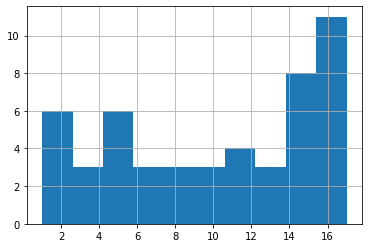

In [ ]:
rawsampledf= rawarrest.sample(50)
weektest = rawsampledf['week_num']
weektest.hist()

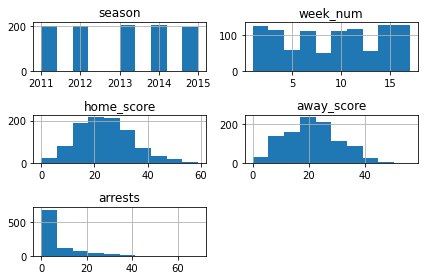

In [ ]:
rawarrest.hist()
plt.tight_layout() #Avoid Title overlap

In [ ]:
#new_cols = [col for col in dta.columns if 'E' in col] 

rawarrest_new = rawarrest.filter(regex='E|N')

In [ ]:
corr = rawarrest_new.corr()
print(corr)

Empty DataFrame
Columns: []
Index: []


In [ ]:
#loading dataset
rawarrest = pd.read_csv('/Users/nikitachandralzrs/Desktop/301/project-group03/data/raw/arrests.csv', sep= ",")
    
#Removing columns
formatdf = rawarrest.copy().drop(columns=['home_team', 'away_team', 'home_score', 'away_score', 'OT_flag', 'division_game'],axis=1).dropna(axis=0)

#Sorting
formatdf.sort_values(by=['season', 'day_of_week'],inplace=True)
    
#Rename columns
formatdf.rename(columns={'day_of_week':'Day of Week','week_num':'Week Number','gametime_local': 'Gametime Local', 
                        'arrests':'Arrests', 'season':'Season'},inplace = True)
#Convert NaN values in arrests to 0
formatdf['Arrests'] = formatdf['Arrests'].fillna(0)

#Save the data in = processed output file
formatdf.to_csv('..\\data\\processed\\SFaheemAnalysisProcess.csv',index=False)

#Now let's quickly observe what our new data looks like
formatdf.head(10)

,Season,Week Number,Day of Week,Gametime Local,Arrests
183,2011,3,Monday,7:30:00 PM,1.0
223,2011,1,Monday,8:15:00 PM,2.0
306,2011,10,Monday,7:30:00 PM,6.0
426,2011,7,Monday,8:30:00 PM,3.0
428,2011,13,Monday,8:30:00 PM,6.0
462,2011,8,Monday,7:30:00 PM,2.0
534,2011,11,Monday,8:30:00 PM,12.0
570,2011,2,Monday,8:30:00 PM,18.0
612,2011,6,Monday,8:30:00 PM,28.0
690,2011,9,Monday,8:30:00 PM,2.0


In [ ]:
loaddf = (pd.read_csv('/Users/nikitachandralzrs/Desktop/301/project-group03/data/raw/arrests.csv', sep= ",")
    .copy().drop(['home_team', 'away_team', 'home_score', 'away_score', 'OT_flag', 'division_game'],axis=1))
loaddf.sort_values(by=['season', 'day_of_week'],inplace=True)
loaddf.rename(columns={'day_of_week':'Day of Week','week_num':'Week Number','gametime_local': 'Gametime Local', 
                        'arrests':'Arrests', 'season':'Season'},inplace = True)
loaddf.head()

,Season,Week Number,Day of Week,Gametime Local,Arrests
183,2011,3,Monday,7:30:00 PM,1.0
223,2011,1,Monday,8:15:00 PM,2.0
264,2011,5,Monday,8:30:00 PM,NaN
306,2011,10,Monday,7:30:00 PM,6.0
426,2011,7,Monday,8:30:00 PM,3.0


In [ ]:
finaldf = loaddf
finaldf['Arrests'] = finaldf['Arrests'].fillna(0)
finaldf.head()

,Season,Week Number,Day of Week,Gametime Local,Arrests
183,2011,3,Monday,7:30:00 PM,1.0
223,2011,1,Monday,8:15:00 PM,2.0
264,2011,5,Monday,8:30:00 PM,0.0
306,2011,10,Monday,7:30:00 PM,6.0
426,2011,7,Monday,8:30:00 PM,3.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

projectdf = (pd.read_csv("..\\data\\processed\\SFaheemAnalysisProcess.csv"))

In [ ]:
dff2 = projectdf.groupby(['Season']).Arrests.sum().reset_index() #Sorts by gametime and sums arrests at each time
dff2 = dff2[dff2['Arrests'] != 0] #remove 0 arrests value for this plot
dff2.head()

,Season,Arrests
0,2011,1187.0
1,2012,1348.0
2,2013,1287.0
3,2014,1323.0
4,2015,1198.0


[Text(0.5, 1.0, 'Total arrests during corresponding season'),
 Text(0, 0.5, 'Season'),
 Text(0.5, 0, 'Arrests')]

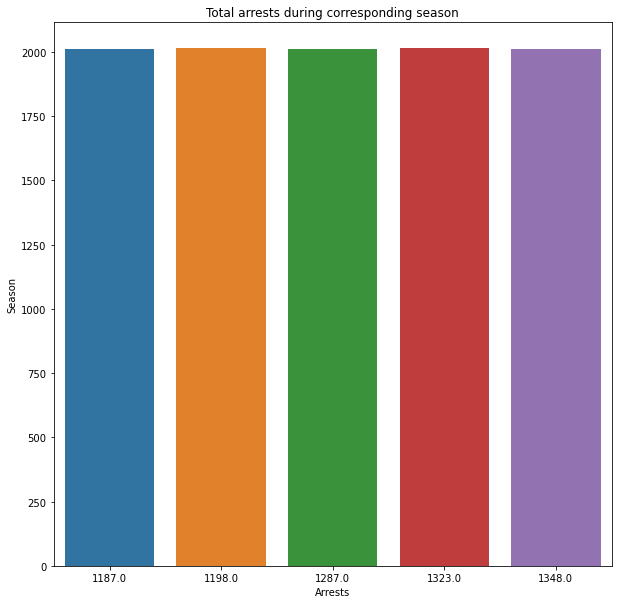

In [ ]:
f, ax = plt.subplots(figsize=(10,10)) #Change figure size
sns.barplot(x='Arrests', y = 'Season', data=dff2).set(title='Total arrests during corresponding season',ylabel='Season', xlabel='Arrests') #PLot barplot

[Text(0.5, 1.0, 'Average number of arrests at a game during corresponding season'),
 Text(0, 0.5, 'Arrests'),
 Text(0.5, 0, 'Seasons')]

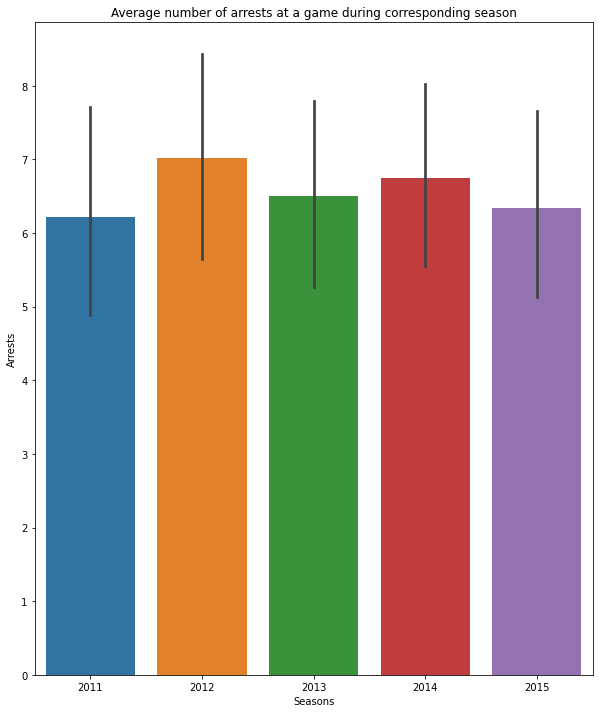

In [ ]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.barplot(x='Season', y = 'Arrests', data=projectdf).set(title='Average number of arrests at a game during corresponding season',ylabel='Arrests', xlabel='Seasons') #PLot barplot

In [ ]:
dff3 = projectdf.groupby(["Day of Week"]).Arrests.sum().reset_index() #Sorts by day and sums arrests at each time
dff3 = dff3[dff3['Arrests'] != 0] #remove 0 for this plot
dff3.head()

,Day of Week,Arrests
0,Monday,527.0
1,Saturday,90.0
2,Sunday,5217.0
3,Thursday,470.0
4,Wednesday,39.0


[Text(0.5, 1.0, 'Total arrests during corresponding game day'),
 Text(0, 0.5, 'Game day'),
 Text(0.5, 0, 'Arrests')]

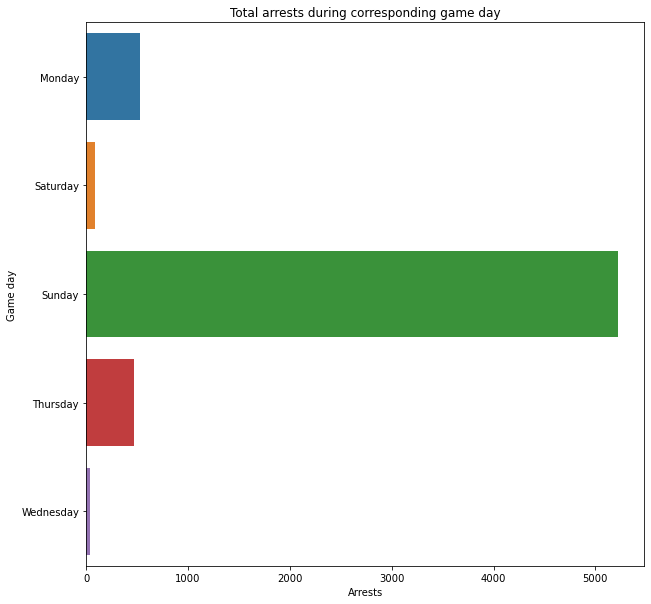

In [ ]:
f, ax = plt.subplots(figsize=(10,10)) #Change figure size
sns.barplot(x='Arrests', y = 'Day of Week', data=dff3).set(title='Total arrests during corresponding game day',ylabel='Game day', xlabel='Arrests') #PLot barplot

[Text(0.5, 1.0, 'Average number of arrests at a game during corresponding game day'),
 Text(0, 0.5, 'Game day'),
 Text(0.5, 0, 'Arrests per game')]

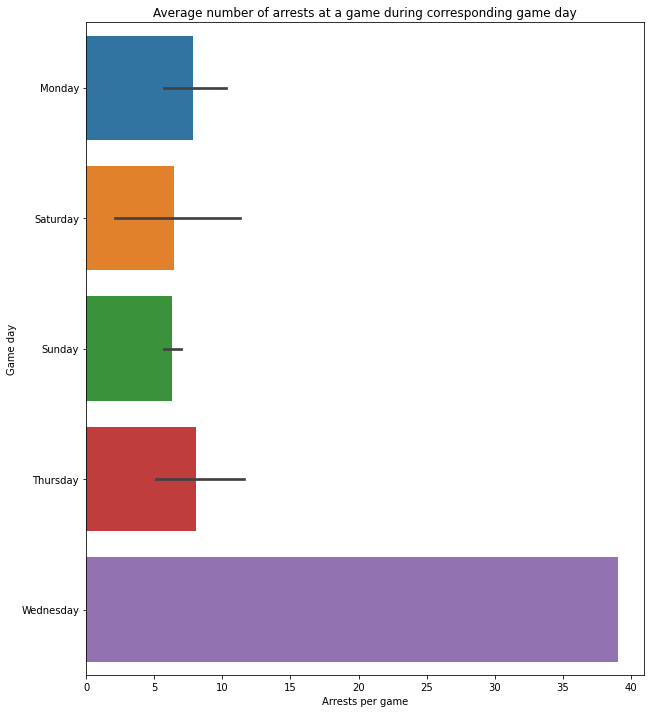

In [ ]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.barplot(x='Arrests', y = 'Day of Week', data=projectdf).set(title='Average number of arrests at a game during corresponding game day',ylabel='Game day', xlabel='Arrests per game') #PLot barplot

[Text(0.5, 1.0, 'Number of games at corresponding gamedays'),
 Text(0, 0.5, 'Gameday'),
 Text(0.5, 0, 'Count of games')]

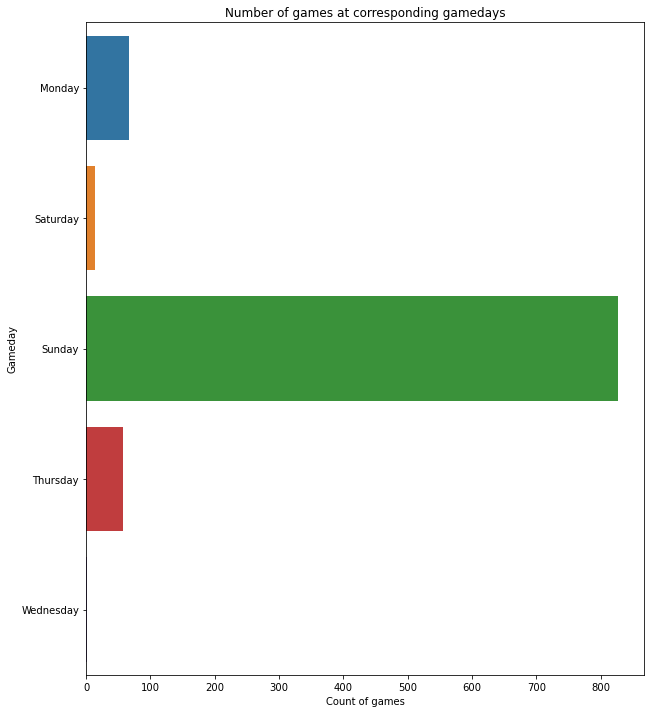

In [ ]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.countplot(y='Day of Week', data=projectdf).set(title='Number of games at corresponding gamedays',ylabel='Gameday', xlabel='Count of games')

In [ ]:
dff4 = projectdf.groupby(["Week Number"]).Arrests.sum().reset_index() #Sorts by week number of season and sums arrests at each time
dff2 = dff4[dff4['Arrests'] != 0]
dff4.head()

,Week Number,Arrests
0,1,409.0
1,2,414.0
2,3,439.0
3,4,298.0
4,5,349.0


[Text(0.5, 1.0, 'Total arrests during corresponding game week'),
 Text(0, 0.5, 'Arrests'),
 Text(0.5, 0, 'Week Number')]

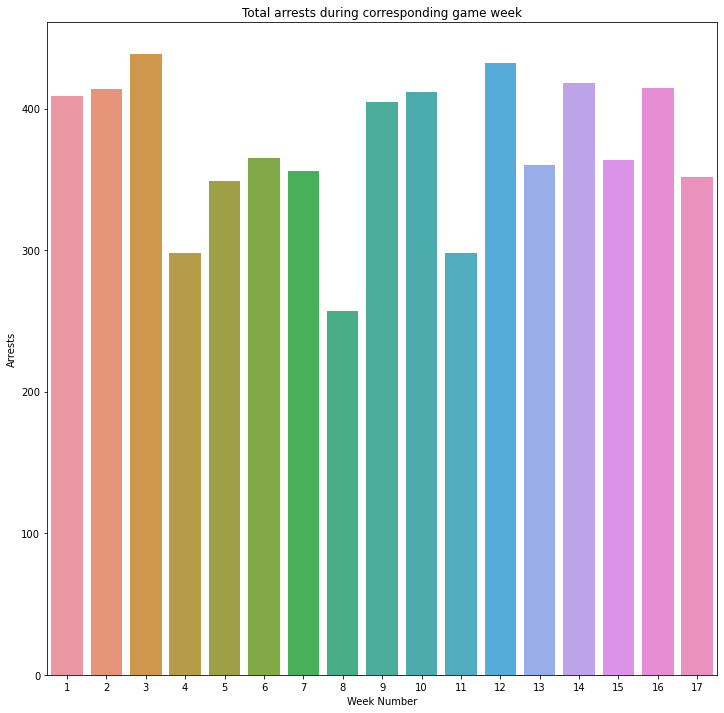

In [ ]:
f, ax = plt.subplots(figsize=(12,12)) #Change figure size
sns.barplot(x='Week Number', y = 'Arrests', data=dff4).set(title='Total arrests during corresponding game week',ylabel='Arrests', xlabel='Week Number') #PLot barplot

[Text(0.5, 1.0, 'Average number of arrests at a game during corresponding game week'),
 Text(0, 0.5, 'Average number of arrests'),
 Text(0.5, 0, 'Week Number')]

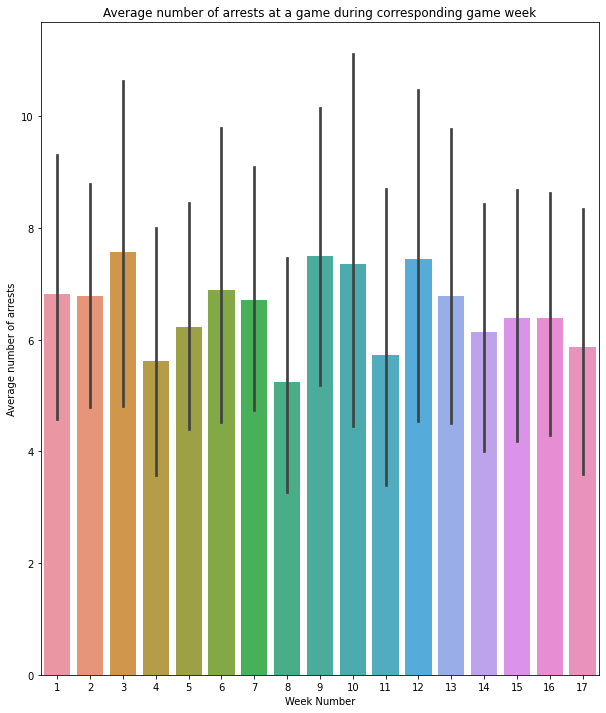

In [ ]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.barplot(y='Arrests', x = 'Week Number', data=projectdf).set(title='Average number of arrests at a game during corresponding game week',ylabel='Average number of arrests', 
                                                                xlabel='Week Number') #PLot barplot

[Text(0.5, 1.0, 'Number of games at corresponding game week'),
 Text(0, 0.5, 'Total games played during week'),
 Text(0.5, 0, 'Week Number')]

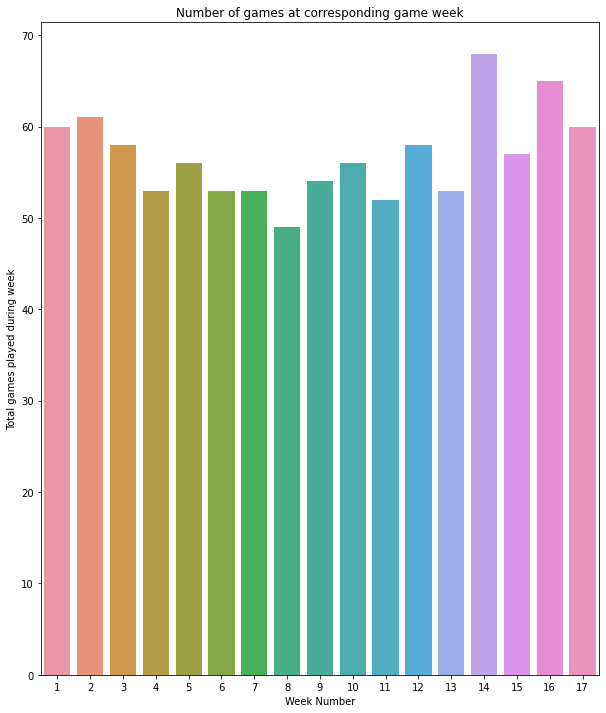

In [ ]:
f, ax = plt.subplots(figsize=(10,12)) #Change figure size
sns.countplot(x='Week Number', data=projectdf).set(title='Number of games at corresponding game week',ylabel='Total games played during week', xlabel='Week Number')

In [ ]:
## Conclusion
---
More arrests are being done after a bad year.

SyntaxError: invalid syntax (<ipython-input-52-b7d06ff4d9df>, line 2)